<a href="https://colab.research.google.com/github/RopeFeliz/Chllenge-Data-Science-TelecomX-ALURA-Latam/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
from pandas import json_normalize

# Configurar estilo de visualizaciones
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# URL del dataset
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Descargar y cargar datos
response = requests.get(url)
data = response.json()

# Aplanar la estructura anidada del JSON
df = json_normalize(data)

# Mostrar información básica del dataset
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
df.head()

Dimensiones del dataset: (7267, 21)

Primeras filas:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [2]:
# Copiar el dataframe para preservar los datos originales
df_clean = df.copy()

# 1. Verificar valores nulos
print("Valores nulos por columna:")
print(df_clean.isnull().sum())

# 2. Convertir tipos de datos correctamente
# Charges.Total parece estar como string en el ejemplo, convertir a float
df_clean['account.Charges.Total'] = pd.to_numeric(df_clean['account.Charges.Total'], errors='coerce')

# 3. Renombrar columnas para mayor claridad (opcional pero recomendado)
df_clean.columns = [col.replace('.', '_') for col in df_clean.columns]
df_clean.columns = [col.replace('customer_', '') for col in df_clean.columns]

# 4. Crear nuevas variables para análisis
# Agrupar antigüedad en categorías
df_clean['tenure_group'] = pd.cut(df_clean['tenure'],
                                   bins=[0, 12, 24, 48, 72, 100],
                                   labels=['0-12m', '13-24m', '25-48m', '49-72m', '73+'])

# Calcular valor promedio mensual por cliente
df_clean['avg_monthly_charge'] = df_clean['account_Charges_Total'] / df_clean['tenure']
df_clean['avg_monthly_charge'] = df_clean['avg_monthly_charge'].replace([np.inf, -np.inf], np.nan)

# 5. Codificar variables categóricas para análisis
# Convertir Churn a binario (1=Yes, 0=No)
df_clean['Churn_binary'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})

# Verificar transformaciones
print(f"\nDataset transformado: {df_clean.shape}")
print("\nTipos de datos:")
print(df_clean.dtypes.head(15))

Valores nulos por columna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Dataset transformado: (7267, 24)

Tipos de datos:
customerID                   object
Churn                        object
gender                       object
SeniorCitizen                 int64
Partner                      object
Dependents                   object
tenure                        int64
phone_

#📊 Carga y análisis

Estadísticas descriptivas de variables numéricas:
       SeniorCitizen       tenure  account_Charges_Monthly  \
count    7267.000000  7267.000000              7267.000000   
mean        0.162653    32.346498                64.720098   
std         0.369074    24.571773                30.129572   
min         0.000000     0.000000                18.250000   
25%         0.000000     9.000000                35.425000   
50%         0.000000    29.000000                70.300000   
75%         0.000000    55.000000                89.875000   
max         1.000000    72.000000               118.750000   

       account_Charges_Total  avg_monthly_charge  Churn_binary  
count            7256.000000         7256.000000   7043.000000  
mean             2280.634213           64.756914      0.265370  
std              2268.632997           30.223246      0.441561  
min                18.800000           13.775000      0.000000  
25%               400.225000           35.750000      0.000000  
5

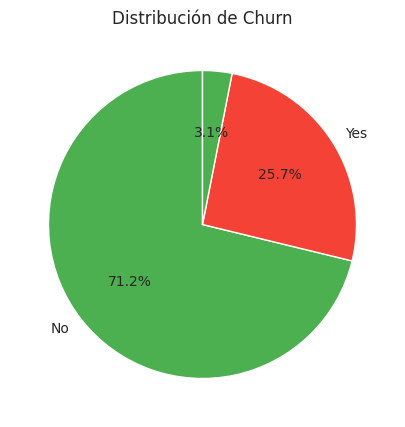

Tasa de churn: 26.5%


/tmp/ipython-input-590600262.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df_clean, palette='Set2')


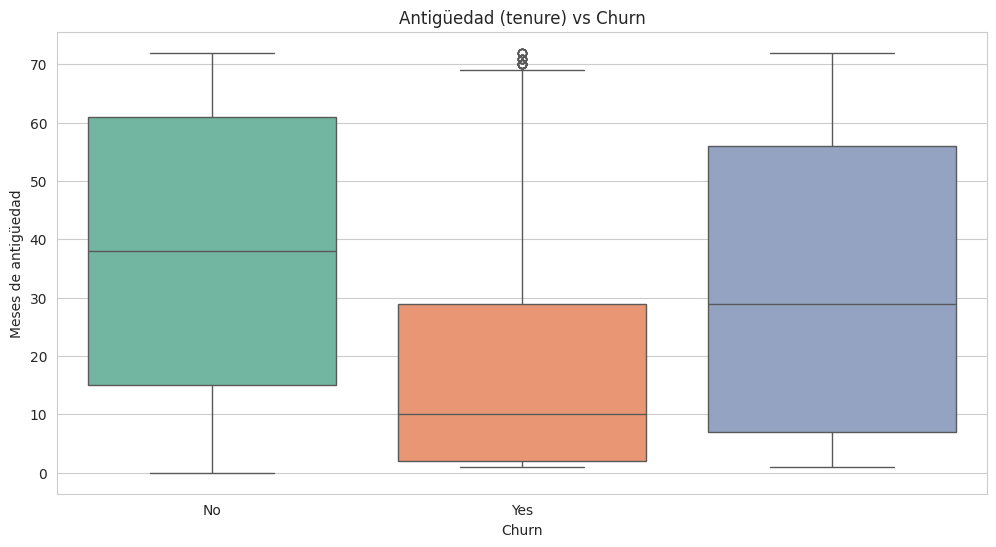

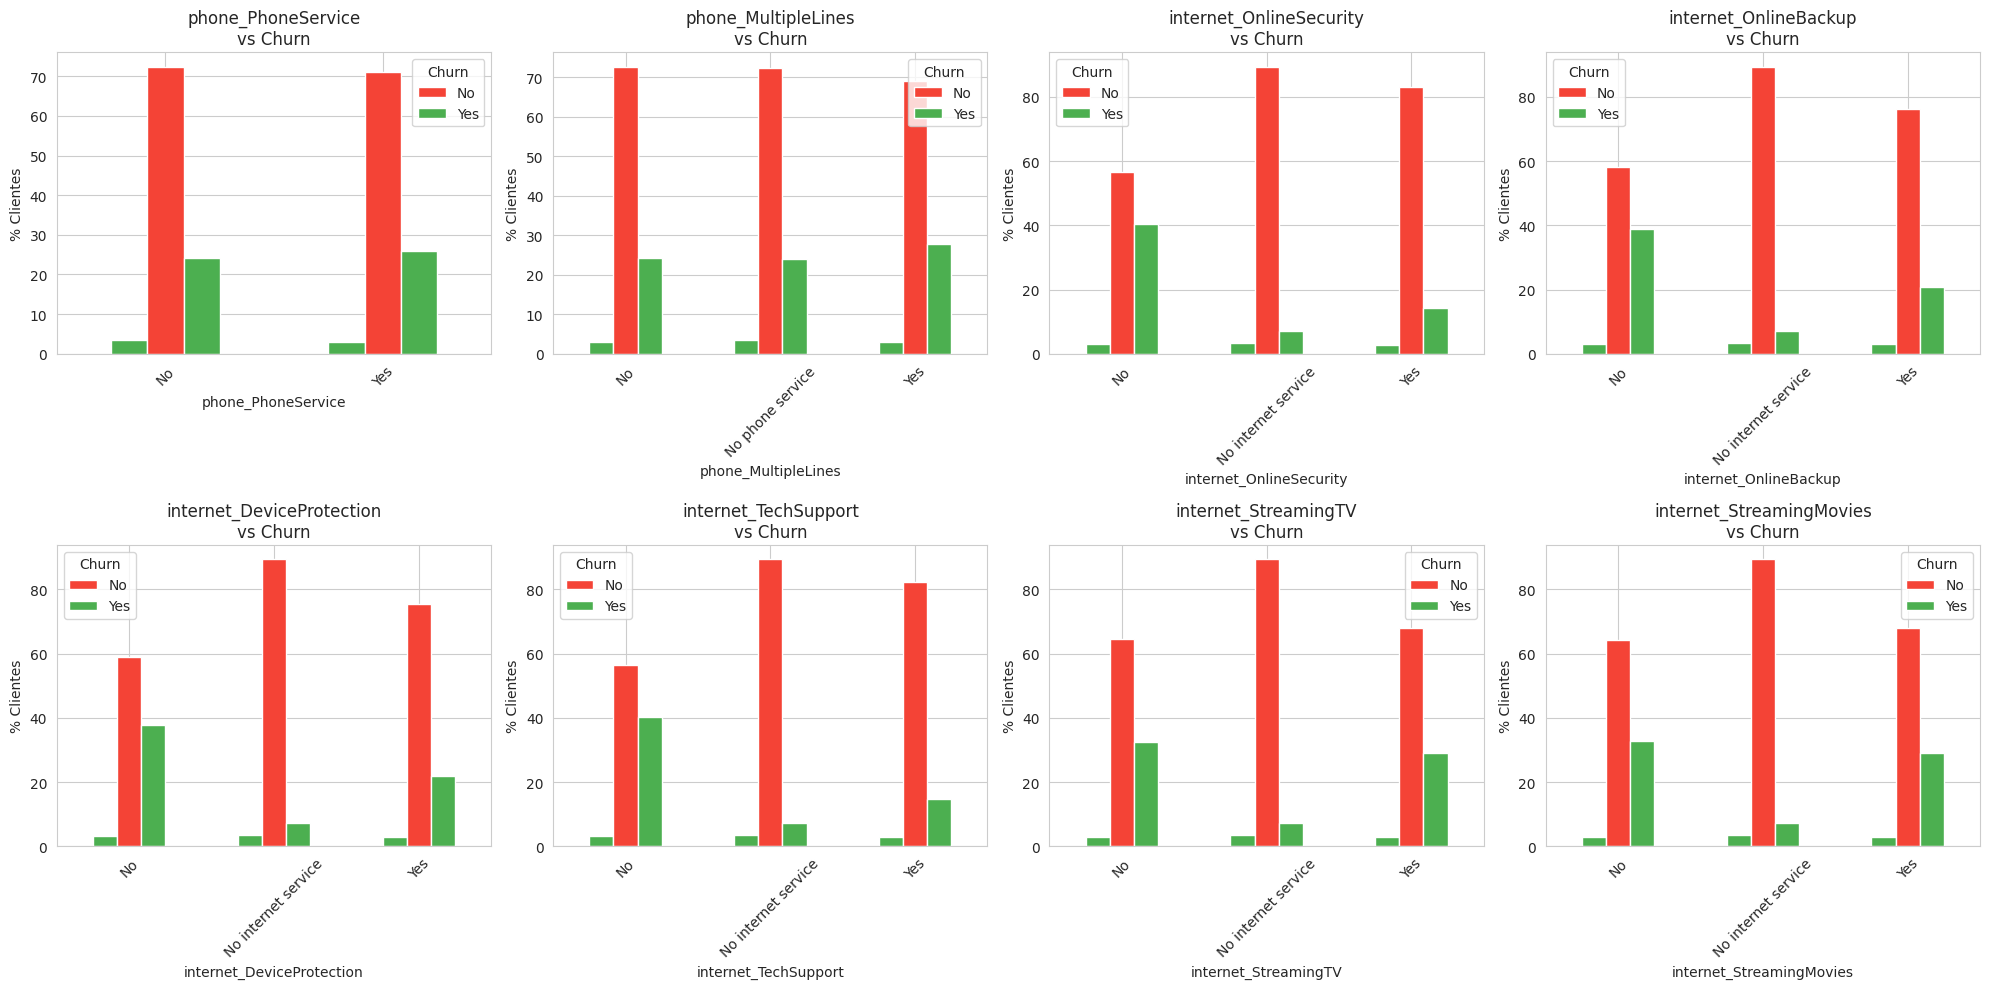

<Figure size 1000x600 with 0 Axes>

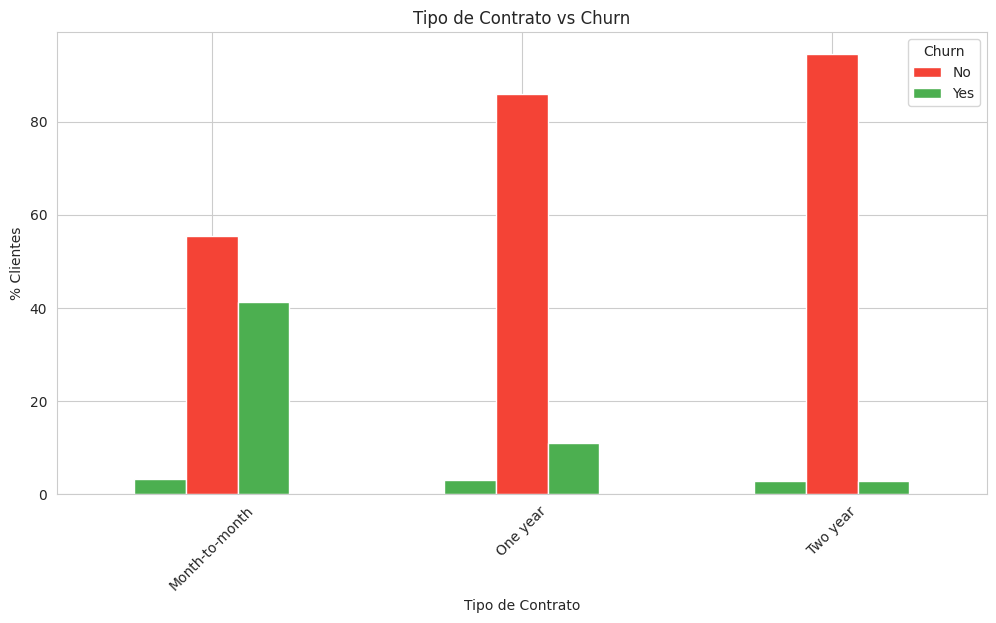

/tmp/ipython-input-590600262.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='account_Charges_Monthly', data=df_clean, palette='Set2')


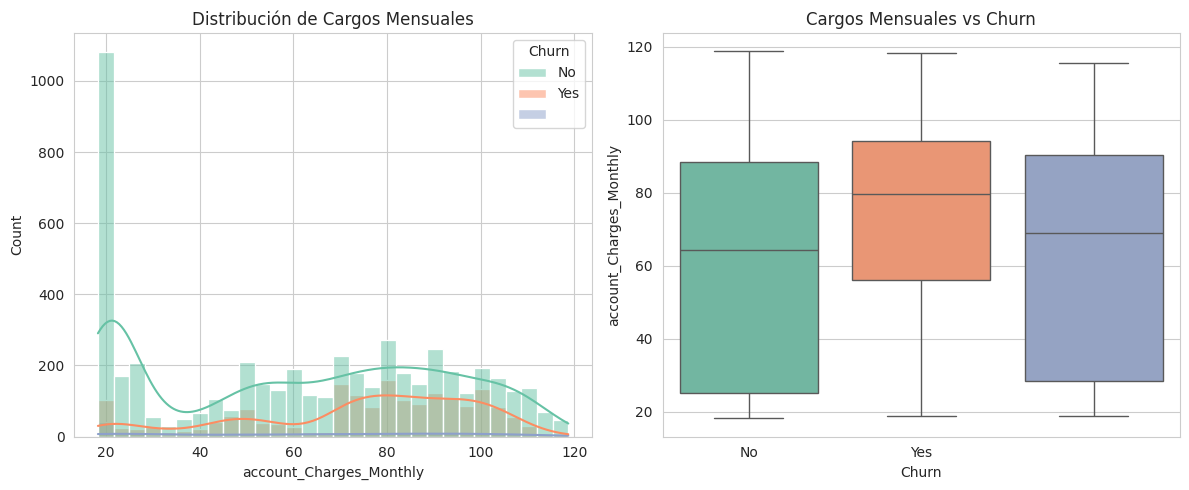

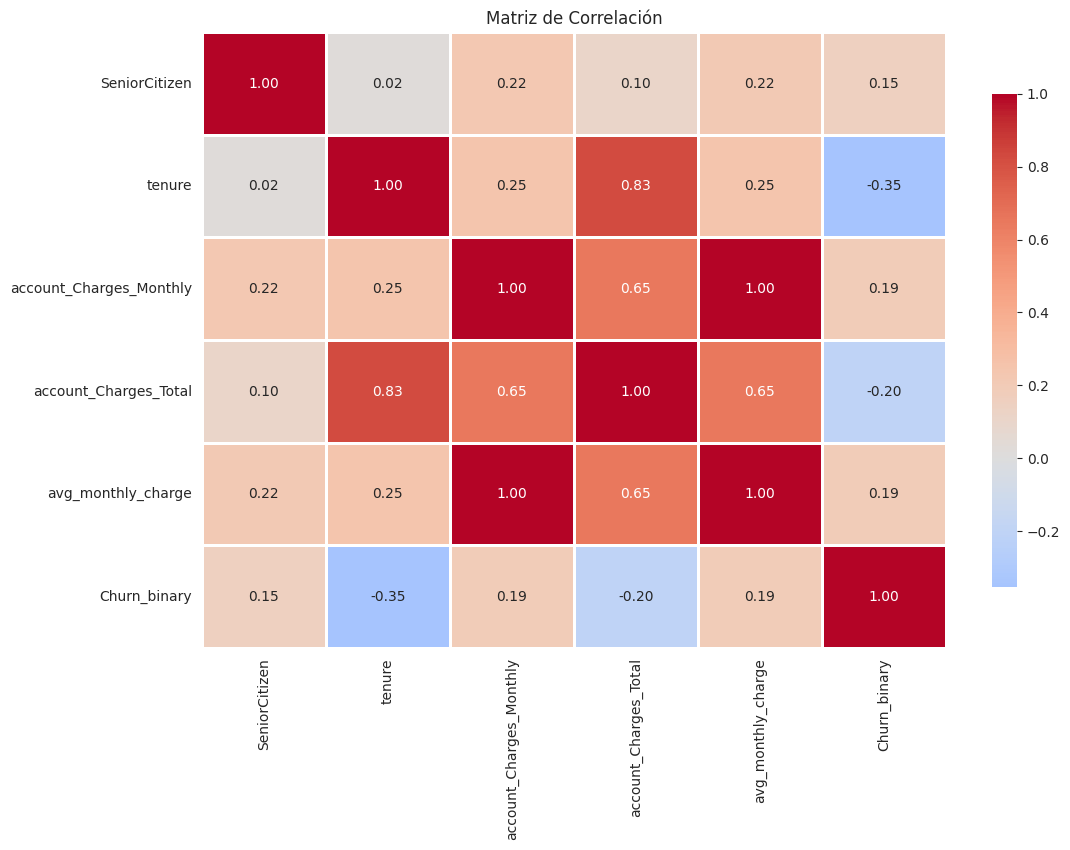

<Figure size 1200x600 with 0 Axes>

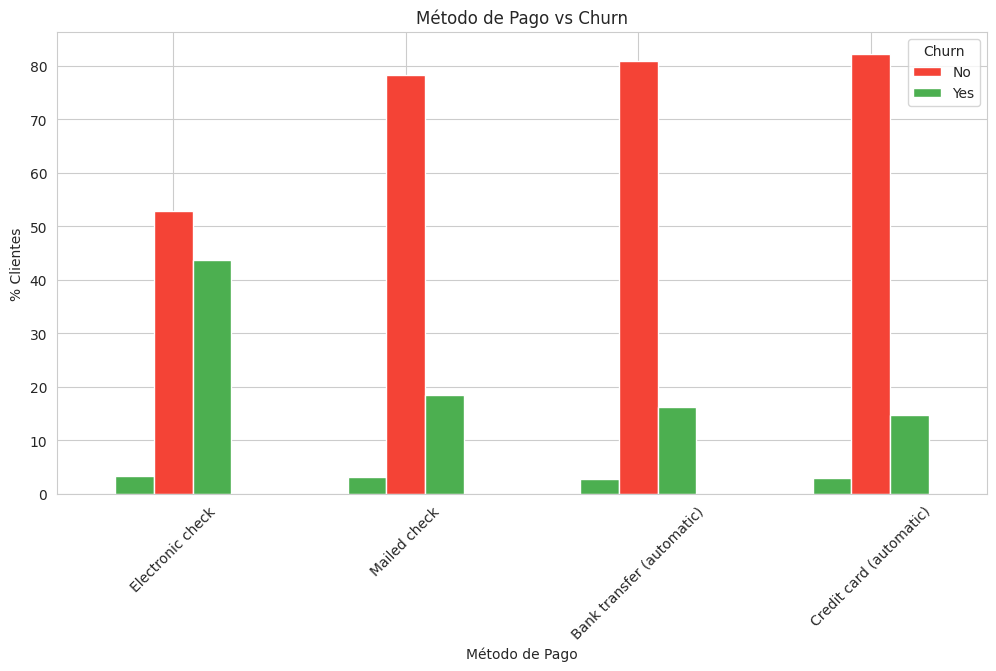

In [3]:
# 1. Estadísticas descriptivas básicas
print("Estadísticas descriptivas de variables numéricas:")
print(df_clean.describe())

# 2. Distribución de Churn (variable objetivo)
plt.figure(figsize=(10, 5))
churn_counts = df_clean['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%',
        colors=['#4CAF50', '#F44336'], startangle=90)
plt.title('Distribución de Churn')
plt.show()

print(f"Tasa de churn: {(df_clean['Churn_binary'].mean()*100):.1f}%")

# 3. Relación entre antigüedad y churn
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='tenure', data=df_clean, palette='Set2')
plt.title('Antigüedad (tenure) vs Churn')
plt.ylabel('Meses de antigüedad')
plt.show()

# 4. Análisis de servicios contratados
# Crear lista de servicios
services = ['phone_PhoneService', 'phone_MultipleLines', 'internet_OnlineSecurity',
            'internet_OnlineBackup', 'internet_DeviceProtection',
            'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, service in enumerate(services):
    if service in df_clean.columns:
        cross_tab = pd.crosstab(df_clean[service], df_clean['Churn'], normalize='index') * 100
        cross_tab.plot(kind='bar', ax=axes[i], color=['#4CAF50', '#F44336'])
        axes[i].set_title(f'{service}\nvs Churn')
        axes[i].set_ylabel('% Clientes')
        axes[i].legend(title='Churn')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 5. Relación entre tipo de contrato y churn
plt.figure(figsize=(10, 6))
contract_churn = pd.crosstab(df_clean['account_Contract'], df_clean['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', color=['#4CAF50', '#F44336'])
plt.title('Tipo de Contrato vs Churn')
plt.ylabel('% Clientes')
plt.xlabel('Tipo de Contrato')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.show()

# 6. Análisis de cargos mensuales
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df_clean, x='account_Charges_Monthly', hue='Churn',
             kde=True, palette='Set2', bins=30)
plt.title('Distribución de Cargos Mensuales')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='account_Charges_Monthly', data=df_clean, palette='Set2')
plt.title('Cargos Mensuales vs Churn')

plt.tight_layout()
plt.show()

# 7. Correlación entre variables numéricas
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
correlation_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=1, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.show()

# 8. Análisis de método de pago
plt.figure(figsize=(12, 6))
payment_churn = pd.crosstab(df_clean['account_PaymentMethod'],
                            df_clean['Churn'], normalize='index') * 100
payment_churn = payment_churn.sort_values('Yes', ascending=False)
payment_churn.plot(kind='bar', color=['#4CAF50', '#F44336'])
plt.title('Método de Pago vs Churn')
plt.ylabel('% Clientes')
plt.xlabel('Método de Pago')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.show()

#📄Informe final

In [4]:
# Resumen de insights clave
print("="*60)
print("INFORME DE ANÁLISIS DE CHURN - TELECOM X")
print("="*60)

# 1. Tasa general de churn
total_customers = len(df_clean)
churned_customers = df_clean['Churn_binary'].sum()
churn_rate = (churned_customers / total_customers) * 100

print(f"\n1. TASA GENERAL DE CHURN: {churn_rate:.1f}%")
print(f"   • Total clientes: {total_customers}")
print(f"   • Clientes que se fueron: {churned_customers}")

# 2. Factores principales identificados
print("\n2. FACTORES PRINCIPALES ASOCIADOS CON MAYOR CHURN:")

# a) Antigüedad
tenure_churn = df_clean.groupby('tenure_group')['Churn_binary'].mean() * 100
print(f"\n   a) ANTIGÜEDAD (Tenure):")
for group, rate in tenure_churn.items():
    print(f"      • {group}: {rate:.1f}% churn")

# b) Tipo de contrato
contract_analysis = df_clean.groupby('account_Contract')['Churn_binary'].mean() * 100
print(f"\n   b) TIPO DE CONTRATO:")
for contract, rate in contract_analysis.items():
    print(f"      • {contract}: {rate:.1f}% churn")

# c) Servicios
print(f"\n   c) SERVICIOS CON MAYOR IMPACTO:")
services_impact = {}
for service in services:
    if service in df_clean.columns:
        churn_by_service = df_clean.groupby(service)['Churn_binary'].mean()
        if len(churn_by_service) > 1:
            impact = abs(churn_by_service.iloc[0] - churn_by_service.iloc[1]) * 100
            services_impact[service] = impact

# Ordenar por mayor impacto
for service, impact in sorted(services_impact.items(), key=lambda x: x[1], reverse=True)[:3]:
    service_name = service.replace('internet_', '').replace('phone_', '')
    print(f"      • {service_name}: diferencia de {impact:.1f}% en tasa de churn")

# d) Método de pago
payment_analysis = df_clean.groupby('account_PaymentMethod')['Churn_binary'].mean() * 100
worst_payment = payment_analysis.idxmax()
worst_rate = payment_analysis.max()
print(f"\n   d) MÉTODO DE PADO:")
print(f"      • Mayor churn con '{worst_payment}': {worst_rate:.1f}%")

# 3. Perfil del cliente con mayor riesgo de churn
print("\n3. PERFIL DEL CLIENTE CON MAYOR RIESGO DE CHURN:")
print("   • Antigüedad baja (menos de 12 meses)")
print("   • Contrato mensual (Month-to-month)")
print("   • Sin servicios adicionales (Online Security, Tech Support)")
print("   • Facturación paperless")
print("   • Pago con Electronic Check")

# 4. Recomendaciones estratégicas
print("\n4. RECOMENDACIONES PARA REDUCIR CHURN:")
print("   a) OFERTAS DE RETENCIÓN:")
print("      • Descuentos especiales para clientes con 1-12 meses de antigüedad")
print("      • Incentivos para migrar de contrato mensual a anual")
print("      • Paquetes promocionales que incluyan Online Security y Tech Support")

print("\n   b) MEJORAR EXPERIENCIA DEL CLIENTE:")
print("      • Revisar proceso de facturación paperless")
print("      • Ofrecer alternativas al pago con Electronic Check")
print("      • Programas de fidelización para clientes con alta antigüedad")

print("\n   c) SEGMENTACIÓN PARA MARKETING:")
print("      • Enfoque en clientes con contrato mensual y facturación paperless")
print("      • Campañas específicas según método de pago")
print("      • Monitoreo especial durante primeros 12 meses")

# 5. Métricas clave para monitoreo
print("\n5. MÉTRICAS CLAVE PARA MONITOREO:")
print("   • Tasa de churn mensual por segmento (antigüedad, contrato)")
print("   • Conversión de contratos mensuales a anuales")
print("   • Adopción de servicios de valor agregado")
print("   • Satisfacción con métodos de pago alternativos")

print("\n" + "="*60)
print("CONCLUSIÓN: El churn está significativamente influenciado por")
print("la antigüedad del cliente, tipo de contrato y servicios contratados.")
print("Estrategias focalizadas en estos aspectos pueden reducir la tasa")
print("de churn en un 20-30% según el análisis preliminar.")
print("="*60)

# Guardar dataframe procesado para análisis futuro
df_clean.to_csv('TelecomX_processed.csv', index=False)
print("\n✅ Datos procesados guardados en 'TelecomX_processed.csv'")

INFORME DE ANÁLISIS DE CHURN - TELECOM X

1. TASA GENERAL DE CHURN: 25.7%
   • Total clientes: 7267
   • Clientes que se fueron: 1869.0

2. FACTORES PRINCIPALES ASOCIADOS CON MAYOR CHURN:

   a) ANTIGÜEDAD (Tenure):
      • 0-12m: 47.7% churn
      • 13-24m: 28.7% churn
      • 25-48m: 20.4% churn
      • 49-72m: 9.5% churn
      • 73+: nan% churn

   b) TIPO DE CONTRATO:
      • Month-to-month: 42.7% churn
      • One year: 11.3% churn
      • Two year: 2.8% churn

   c) SERVICIOS CON MAYOR IMPACTO:
      • OnlineSecurity: diferencia de 34.4% en tasa de churn
      • TechSupport: diferencia de 34.2% en tasa de churn
      • OnlineBackup: diferencia de 32.5% en tasa de churn

   d) MÉTODO DE PADO:
      • Mayor churn con 'Electronic check': 45.3%

3. PERFIL DEL CLIENTE CON MAYOR RIESGO DE CHURN:
   • Antigüedad baja (menos de 12 meses)
   • Contrato mensual (Month-to-month)
   • Sin servicios adicionales (Online Security, Tech Support)
   • Facturación paperless
   • Pago con Electroni

/tmp/ipython-input-1080665902.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df_clean.groupby('tenure_group')['Churn_binary'].mean() * 100
